1. Consider a region, get kendall coefficient for the first phase according to phases we have set.
2. Do the same for all the regions and store the kendall coefficients accordingly. 
3. Plot the Italy map, first phase for all the mobility categories. 

In [8]:
import pandas as pd   
import numpy as np   
import random 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Importing Incidence dataset

In [9]:
df_regionInc = pd.read_csv("covid19dh.csv", dtype = {"Province/State":str, "Country/Region":str})
# cols 7 and 8 were giving me errors, so dtype str is used on them.
df_regionInc

,ObservationDate,Tests,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
0,2020-01-01,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
1,2020-01-02,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-01-03,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-01-04,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-01-05,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393715,2021-01-16,5107,1182.0,1146,20,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
393716,2021-01-17,5124,1184.0,1146,20,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
393717,2021-01-18,5124,1192.0,1149,20,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
393718,2021-01-19,5130,1192.0,1159,20,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02


In [10]:
df_italyInc = df_regionInc[df_regionInc.ISO3=="ITA"]
df_italyInc

,ObservationDate,Tests,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
33968,2020-01-01,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.0
33969,2020-01-02,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.0
33970,2020-01-03,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.0
33971,2020-01-04,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.0
33972,2020-01-05,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389083,2021-01-16,524445,35572.0,16999,898,1648176.0,ITA,Sardegna,Italy,2,...,2,4,1,2,2,3,2,2,2,78.7
389084,2021-01-17,527564,35774.0,17123,903,1648176.0,ITA,Sardegna,Italy,2,...,2,4,1,2,2,3,2,2,2,78.7
389085,2021-01-18,530803,35910.0,17387,907,1648176.0,ITA,Sardegna,Italy,2,...,2,4,1,2,2,3,2,2,2,78.7
389086,2021-01-19,533721,36019.0,17682,915,1648176.0,ITA,Sardegna,Italy,2,...,2,4,1,2,2,3,2,2,2,78.7


In [11]:
df_italyInc = df_italyInc.dropna() # drop all the NaN's in case if they are there. 

In [12]:
Infected = df_italyInc['Confirmed'] -  df_italyInc['Recovered'] -  df_italyInc['Deaths']

In [13]:
df_italyInc.insert(3,"Infected",Infected)          

In [14]:
df_italyInc       

,ObservationDate,Tests,Confirmed,Infected,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
85692,2020-01-01,0,0.0,0.0,0,0,1215538.0,ITA,Friuli Venezia Giulia,Italy,...,0,0,0,0,0,0,0,0,0,0.0
85693,2020-01-02,0,0.0,0.0,0,0,1215538.0,ITA,Friuli Venezia Giulia,Italy,...,0,0,0,0,0,0,0,0,0,0.0
85694,2020-01-03,0,0.0,0.0,0,0,1215538.0,ITA,Friuli Venezia Giulia,Italy,...,0,0,0,0,0,0,0,0,0,0.0
85695,2020-01-04,0,0.0,0.0,0,0,1215538.0,ITA,Friuli Venezia Giulia,Italy,...,0,0,0,0,0,0,0,0,0,0.0
85696,2020-01-05,0,0.0,0.0,0,0,1215538.0,ITA,Friuli Venezia Giulia,Italy,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389083,2021-01-16,524445,35572.0,17675.0,16999,898,1648176.0,ITA,Sardegna,Italy,...,2,4,1,2,2,3,2,2,2,78.7
389084,2021-01-17,527564,35774.0,17748.0,17123,903,1648176.0,ITA,Sardegna,Italy,...,2,4,1,2,2,3,2,2,2,78.7
389085,2021-01-18,530803,35910.0,17616.0,17387,907,1648176.0,ITA,Sardegna,Italy,...,2,4,1,2,2,3,2,2,2,78.7
389086,2021-01-19,533721,36019.0,17422.0,17682,915,1648176.0,ITA,Sardegna,Italy,...,2,4,1,2,2,3,2,2,2,78.7


In [15]:
# Consider only these 3 cols
df_italyInc = df_italyInc.filter(["ObservationDate","Infected", "Province/State"], axis=1)
#df_italyInc

In [16]:
# check the list of provinces
region_namesInc = list(df_italyInc["Province/State"].unique())
#region_namesInc

In [17]:
#df_oneProvince = df_region[df_region["Province/State"]==provinces[0]]
#df_oneProvince

In [18]:
# introducing lag of 5 days due to incubation period. 
#df_1proPhase1 = df_oneProvince[df_oneProvince["ObservationDate"].between("2020-02-29","2021-01-15")]

In [19]:
#I_ph1 = df_1proPhase1["Confirmed"]

In [20]:
#I_ph1

# Importing Mobility dataset

In [21]:
file = '2020_IT_Region_Mobility_Report.csv'
data = pd.read_csv(file,sep=',')
df_italyMob = pd.DataFrame(data)
#data_df = data_df.head(n=329) # we want only national data

In [22]:
# get the names from of the regions from the mobility dataset
region_namesMob = list(df_italyMob["sub_region_1"].dropna().unique())
region_namesMob

['Abruzzo',
 'Aosta',
 'Apulia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli-Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardy',
 'Marche',
 'Molise',
 'Piedmont',
 'Sardinia',
 'Sicily',
 'Trentino-South Tyrol',
 'Tuscany',
 'Umbria',
 'Veneto']

In [24]:
len(region_namesMob)

20

In [25]:
len(region_namesInc)

21

In [23]:
region_namesInc

['Friuli Venezia Giulia',
 'P.A. Bolzano',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'P.A. Trento',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

In [17]:
# clearly, there exists slight differences between the region names as obtained from Incidence data and as obtained
# from mobility data. So, what we do is, since mobility data is International, if the names are slightly 
# different in Incidence data region names, we replace it with names from Mobility data as seen above.

In [18]:
# create a dictionary to replace the names.
replace_dict = {"Friuli Venezia Giulia":"Friuli-Venezia Giulia",'Lombardia':'Lombardy','P.A. Trento':'Trentino-South Tyrol',
               'Piemonte':'Piedmont',"Valle d'Aosta":'Aosta', 'Sicilia':'Sicily','Puglia':'Apulia','Toscana':'Tuscany',
               'Sardegna':'Sardinia'}

In [19]:
df_italyInc

,ObservationDate,Infected,Province/State
85692,2020-01-01,0.0,Friuli Venezia Giulia
85693,2020-01-02,0.0,Friuli Venezia Giulia
85694,2020-01-03,0.0,Friuli Venezia Giulia
85695,2020-01-04,0.0,Friuli Venezia Giulia
85696,2020-01-05,0.0,Friuli Venezia Giulia
...,...,...,...
389083,2021-01-16,17675.0,Sardegna
389084,2021-01-17,17748.0,Sardegna
389085,2021-01-18,17616.0,Sardegna
389086,2021-01-19,17422.0,Sardegna


In [20]:
# Replace to correct names of regions as seen in above incidence data.
for i in range(len(replace_dict.keys())):
    df_italyInc['Province/State'].replace(list(replace_dict.keys())[i],list(replace_dict.values())[i], inplace=True)

In [21]:
# As you can visually see below in last 5 rows, Sardegna has been changed to Sardinia. 
df_italyInc

,ObservationDate,Infected,Province/State
85692,2020-01-01,0.0,Friuli-Venezia Giulia
85693,2020-01-02,0.0,Friuli-Venezia Giulia
85694,2020-01-03,0.0,Friuli-Venezia Giulia
85695,2020-01-04,0.0,Friuli-Venezia Giulia
85696,2020-01-05,0.0,Friuli-Venezia Giulia
...,...,...,...
389083,2021-01-16,17675.0,Sardinia
389084,2021-01-17,17748.0,Sardinia
389085,2021-01-18,17616.0,Sardinia
389086,2021-01-19,17422.0,Sardinia


# Cleaning and filtering mobility data

In [22]:
#mob = data_df[data_df['date'].between('2020-02-24', '2021-01-20')] # this this the range of dates we are interested in
#mob

In [23]:
df_italyMob

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-15,3.0,-1.0,35.0,9.0,0.0,-1.0
1,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-16,3.0,2.0,26.0,11.0,1.0,-2.0
2,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-17,0.0,1.0,7.0,3.0,1.0,0.0
3,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-18,3.0,1.0,16.0,4.0,1.0,0.0
4,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-19,0.0,-1.0,11.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41775,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,2021-01-04,-30.0,24.0,1.0,-57.0,-50.0,18.0
41776,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,2021-01-05,-55.0,5.0,-33.0,-66.0,-54.0,23.0
41777,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,2021-01-06,-78.0,-61.0,-27.0,-77.0,-84.0,35.0
41778,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,2021-01-07,-22.0,6.0,-4.0,-45.0,-26.0,13.0


In [24]:
# Here we come up with logic that, we consider only those rows that have NaN's in sub_region_2
remove_province_data = (np.array(df_italyMob['sub_region_2'].isnull()))
df_italyMob = df_italyMob[remove_province_data]
df_italyMob

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-15,3.0,-1.0,35.0,9.0,0.0,-1.0
1,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-16,3.0,2.0,26.0,11.0,1.0,-2.0
2,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-17,0.0,1.0,7.0,3.0,1.0,0.0
3,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-18,3.0,1.0,16.0,4.0,1.0,0.0
4,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-19,0.0,-1.0,11.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39472,IT,Italy,Veneto,NaN,NaN,IT-34,NaN,2021-01-04,-32.0,16.0,-20.0,-52.0,-49.0,18.0
39473,IT,Italy,Veneto,NaN,NaN,IT-34,NaN,2021-01-05,-57.0,-2.0,-48.0,-64.0,-54.0,24.0
39474,IT,Italy,Veneto,NaN,NaN,IT-34,NaN,2021-01-06,-78.0,-62.0,-48.0,-75.0,-83.0,35.0
39475,IT,Italy,Veneto,NaN,NaN,IT-34,NaN,2021-01-07,-26.0,1.0,-22.0,-46.0,-27.0,13.0


In [25]:
# Now we drop the columns that we don't require for mobility analysis.
df_italyMob=df_italyMob.drop(['country_region_code', 'country_region', 'sub_region_2','metro_area','iso_3166_2_code',
        'census_fips_code'], axis=1)
df_italyMob

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,2020-02-15,3.0,-1.0,35.0,9.0,0.0,-1.0
1,NaN,2020-02-16,3.0,2.0,26.0,11.0,1.0,-2.0
2,NaN,2020-02-17,0.0,1.0,7.0,3.0,1.0,0.0
3,NaN,2020-02-18,3.0,1.0,16.0,4.0,1.0,0.0
4,NaN,2020-02-19,0.0,-1.0,11.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...
39472,Veneto,2021-01-04,-32.0,16.0,-20.0,-52.0,-49.0,18.0
39473,Veneto,2021-01-05,-57.0,-2.0,-48.0,-64.0,-54.0,24.0
39474,Veneto,2021-01-06,-78.0,-62.0,-48.0,-75.0,-83.0,35.0
39475,Veneto,2021-01-07,-26.0,1.0,-22.0,-46.0,-27.0,13.0


In [26]:
# now we drop the whole row itself if there exists NaN anywhere in df.
df_italyMob = df_italyMob.dropna()
#df_italyMob

In [27]:
df_italyMob[df_italyMob["sub_region_1"]=='Aosta']

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1974,Aosta,2020-02-15,8.0,5.0,27.0,12.0,2.0,-1.0
1975,Aosta,2020-02-16,9.0,6.0,14.0,14.0,1.0,0.0
1976,Aosta,2020-02-17,11.0,8.0,14.0,5.0,1.0,0.0
1977,Aosta,2020-02-18,12.0,7.0,25.0,9.0,3.0,-1.0
1978,Aosta,2020-02-19,5.0,7.0,10.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...
2298,Aosta,2021-01-04,-49.0,5.0,-26.0,-52.0,-46.0,17.0
2299,Aosta,2021-01-05,-61.0,-3.0,-29.0,-59.0,-49.0,20.0
2300,Aosta,2021-01-06,-79.0,-53.0,-44.0,-72.0,-75.0,29.0
2301,Aosta,2021-01-07,-43.0,-7.0,-28.0,-48.0,-30.0,14.0


In [28]:
df_italyInc[df_italyInc["Province/State"]=='Aosta']

,ObservationDate,Infected,Province/State
284868,2020-01-01,0.0,Aosta
284869,2020-01-02,0.0,Aosta
284870,2020-01-03,0.0,Aosta
284871,2020-01-04,0.0,Aosta
284872,2020-01-05,0.0,Aosta
...,...,...,...
285249,2021-01-16,413.0,Aosta
285250,2021-01-17,415.0,Aosta
285251,2021-01-18,415.0,Aosta
285252,2021-01-19,398.0,Aosta


# For now we have the two required cleaned and filtered datasets for Incidence and mobility

In [29]:
df_italyInc

,ObservationDate,Infected,Province/State
85692,2020-01-01,0.0,Friuli-Venezia Giulia
85693,2020-01-02,0.0,Friuli-Venezia Giulia
85694,2020-01-03,0.0,Friuli-Venezia Giulia
85695,2020-01-04,0.0,Friuli-Venezia Giulia
85696,2020-01-05,0.0,Friuli-Venezia Giulia
...,...,...,...
389083,2021-01-16,17675.0,Sardinia
389084,2021-01-17,17748.0,Sardinia
389085,2021-01-18,17616.0,Sardinia
389086,2021-01-19,17422.0,Sardinia


In [30]:
df_italyMob

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
329,Abruzzo,2020-02-15,2.0,2.0,36.0,9.0,0.0,-1.0
330,Abruzzo,2020-02-16,2.0,8.0,47.0,26.0,-1.0,-2.0
331,Abruzzo,2020-02-17,-1.0,2.0,11.0,7.0,1.0,-1.0
332,Abruzzo,2020-02-18,1.0,2.0,22.0,5.0,2.0,-1.0
333,Abruzzo,2020-02-19,-4.0,-1.0,-12.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
39472,Veneto,2021-01-04,-32.0,16.0,-20.0,-52.0,-49.0,18.0
39473,Veneto,2021-01-05,-57.0,-2.0,-48.0,-64.0,-54.0,24.0
39474,Veneto,2021-01-06,-78.0,-62.0,-48.0,-75.0,-83.0,35.0
39475,Veneto,2021-01-07,-26.0,1.0,-22.0,-46.0,-27.0,13.0


### the following are my trials, do not look at them (do not delete them)

In [31]:
regions_list= ['Abruzzo',
 'Aosta',
 'Apulia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli-Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardy',
 'Marche',
 'Molise',
 'Piedmont',
 'Sardinia',
 'Sicily',
 'Trentino-South Tyrol',
 'Tuscany',
 'Umbria',
 'Veneto']

In [32]:
#mob = df_italyMob[df_italyMob['sub_region_1']=='Aosta'] 
#inc = df_italyInc[df_italyInc['Province/State']=='Abruzzo'] 

In [33]:
#Abruzzo_mob = df_italyMob[df_italyMob['sub_region_1']=='Aosta'] 
#Abruzzo_inc = df_italyInc[df_italyInc['Province/State']=='Aosta'] 
#Abruzzo_mob

In [34]:
#Abruzzo_mob = df_italyMob[df_italyMob['sub_region_1']=='Abruzzo'] 
#Abruzzo_inc = df_italyInc[df_italyInc['Province/State']=='Abruzzo'] 
#Abruzzo_inc = Abruzzo_inc[Abruzzo_inc['ObservationDate'].between('2020-02-15','2021-01-08')]
#Abruzzo_mob = Abruzzo_mob[Abruzzo_mob['date'].between('2020-02-15','2021-01-08')]
#idx1 = pd.Index(Abruzzo_inc['ObservationDate'])
#idx2 = pd.Index(Abruzzo_mob['date'])
#missing_dates = idx1.difference(idx2) 
#for i in range(len(missing_dates)):
 #   Abruzzo_inc = Abruzzo_inc[Abruzzo_inc.ObservationDate != missings_dates[i]]
#Abruzzo_inc = Abruzzo_inc[Abruzzo_inc['ObservationDate'].between('2020-02-15','2021-01-03')]
#Abruzzo_mob = Abruzzo_mob[Abruzzo_mob['date'].between('2020-02-20','2021-01-08')]

In [35]:
#y1 = Abruzzo_mob['retail_and_recreation_percent_change_from_baseline']
#y2 = Abruzzo_mob['parks_percent_change_from_baseline']
#y3 = Abruzzo_mob['transit_stations_percent_change_from_baseline']
#y4 = Abruzzo_mob['workplaces_percent_change_from_baseline']
#y5 = Abruzzo_mob['residential_percent_change_from_baseline']
#y6 = Abruzzo_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
#x = Abruzzo_inc['Confirmed']

In [36]:
mobility_list = ['retail_and_recreation_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline'] 


In [37]:
#from scipy import stats
#taus = []
#p_values = []
#tau, p_value = stats.kendalltau(x, y1)
#taus.append(tau)
#print(taus)
#print("*************")
#tau, p_value = stats.kendalltau(x, y2)
#taus.append(tau)
#print(taus)
#tau, p_value = stats.kendalltau(x, y3)
#taus.append(tau)
#print(taus)
#print("*************")
#tau, p_value = stats.kendalltau(x, y4)
#taus.append(tau)
#print(taus)
#tau, p_value = stats.kendalltau(x, y5)
#taus.append(tau)
#print(taus)
#print("*************")
#tau, p_value = stats.kendalltau(x, y6)
#taus.append(tau)
#print(taus)
#data_to_append = {}
#for i in range(len(df_tau.columns)):
 #   data_to_append[df_tau.columns[i]] = taus[i]
#df_tau = df_tau.append(data_to_append,ignore_index=True)
#df_tau

In [38]:
#df_tau = pd.DataFrame(np.zeros((len(regions_list)*len(mobility_list))).reshape((20,6)),index=regions_list, columns = mobility_list)
#df_tau

In [39]:
#df_pvalue = pd.DataFrame(np.zeros((len(regions_list)*len(mobility_list))).reshape((20,6)),index=regions_list, columns = mobility_list)
#df_pvalue

In [40]:
#df_tau.iloc[0] = taus
#df_tau
#df_tau

In [41]:
#idx1 = pd.Index([1, 2, 3, 4])
#idx2 = pd.Index([3, 4, 5, 6])
#idx1
#idx2
#a = np.ones((len(regions_list)*len(mobility_list))).reshape((20,6))
#df_tau.append(a, ignore_index=True)

In [42]:
#idx1.difference(idx2)

In [43]:
#idx1 = pd.Index(Abruzzo_inc['ObservationDate'])
#idx2 = pd.Index(Abruzzo_mob['date'])
#missing_dates = idx1.difference(idx2) 
#np.array(missing_dates)

In [44]:
#for i in range(len(missing_dates)):
 #   Abruzzo_inc = Abruzzo_inc[Abruzzo_inc.ObservationDate != missings_dates[i]]

In [45]:
#len(Abruzzo_inc)==len(Abruzzo_mob)

In [46]:
#Abruzzo_inc.iloc[0]

In [47]:
#Abruzzo_inc = Abruzzo_inc[Abruzzo_inc['ObservationDate'].between('2020-02-15','2021-01-03')]
#Abruzzo_mob = Abruzzo_mob[Abruzzo_mob['date'].between('2020-02-20','2021-01-08')]

### FOR ALL THE REGIONS

In [48]:
from scipy import stats

In [49]:
mobility_list = ['retail_and_recreation_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline'] 


regions_list= ['Abruzzo',
 'Aosta',
 'Apulia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli-Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardy',
 'Marche',
 'Molise',
 'Piedmont',
 'Sardinia',
 'Sicily',
 'Trentino-South Tyrol',
 'Tuscany',
 'Umbria',
 'Veneto']

In [50]:
aa = np.empty((len(regions_list)*len(mobility_list))).reshape((20,6))
aa[:] = np.nan
df_tau = pd.DataFrame(aa, columns = mobility_list)
df_tau.insert(0, "Region", regions_list)
df_tau.insert(1, "reg_code", [13,2,16,17,18,15,8,6,12,7,3,11,14,1,20,19,4,9,10,5]) 
df_tau


,Region,reg_code,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,Abruzzo,13,NaN,NaN,NaN,NaN,NaN,NaN
1,Aosta,2,NaN,NaN,NaN,NaN,NaN,NaN
2,Apulia,16,NaN,NaN,NaN,NaN,NaN,NaN
3,Basilicata,17,NaN,NaN,NaN,NaN,NaN,NaN
4,Calabria,18,NaN,NaN,NaN,NaN,NaN,NaN
5,Campania,15,NaN,NaN,NaN,NaN,NaN,NaN
6,Emilia-Romagna,8,NaN,NaN,NaN,NaN,NaN,NaN
7,Friuli-Venezia Giulia,6,NaN,NaN,NaN,NaN,NaN,NaN
8,Lazio,12,NaN,NaN,NaN,NaN,NaN,NaN
9,Liguria,7,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
aa = np.empty((len(regions_list)*len(mobility_list))).reshape((20,6))
aa[:] = np.nan
df_pvalue = pd.DataFrame(aa, columns = mobility_list)
df_pvalue.insert(0, "Region", regions_list)
df_pvalue.insert(1, "reg_code", [13,2,16,17,18,15,8,6,12,7,3,11,14,1,20,19,4,9,10,5]) 
df_pvalue


,Region,reg_code,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,Abruzzo,13,NaN,NaN,NaN,NaN,NaN,NaN
1,Aosta,2,NaN,NaN,NaN,NaN,NaN,NaN
2,Apulia,16,NaN,NaN,NaN,NaN,NaN,NaN
3,Basilicata,17,NaN,NaN,NaN,NaN,NaN,NaN
4,Calabria,18,NaN,NaN,NaN,NaN,NaN,NaN
5,Campania,15,NaN,NaN,NaN,NaN,NaN,NaN
6,Emilia-Romagna,8,NaN,NaN,NaN,NaN,NaN,NaN
7,Friuli-Venezia Giulia,6,NaN,NaN,NaN,NaN,NaN,NaN
8,Lazio,12,NaN,NaN,NaN,NaN,NaN,NaN
9,Liguria,7,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
from datetime import datetime
from datetime import timedelta


In [53]:
# Test



reg_mob = df_italyMob[df_italyMob['sub_region_1']=='Aosta'] 
reg_inc = df_italyInc[df_italyInc['Province/State']=='Aosta'] 
reg_inc = reg_inc[reg_inc['ObservationDate'].between('2020-03-01','2020-12-10')]
reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2020-12-10')] 

idx1 = pd.Index(reg_inc['ObservationDate'])
idx2 = pd.Index(reg_mob['date'])
       # len(reg_inc)==len(reg_mob)
missing_dates = idx1.difference(idx2) 
#print(missing_dates)
for w in range(len(missing_dates)):
    reg_inc = reg_inc[reg_inc.ObservationDate != missing_dates[w]]
       # len(reg_inc)==len(reg_mob)
missing_dates2 = idx2.difference(idx1) 
#print(missing_dates2)
for q in range(len(missing_dates2)):
    reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
#print(len(reg_inc))
#print(len(reg_mob))

# reset index
reg_inc = reg_inc.reset_index()
reg_mob = reg_mob.reset_index()

inc_startdate = '2020-05-04'
inc_enddate = '2020-10-20'
reg_inc = reg_inc[reg_inc['ObservationDate'].between(inc_startdate,inc_enddate)]
reg_inc = reg_inc.reset_index()

ndays_selected = len(reg_inc)

dt_format_incstart = datetime.strptime(inc_startdate, '%Y-%m-%d')
dt_format_regstart = dt_format_incstart + timedelta(days=14)
reg_startdate = dt_format_regstart.strftime("%Y-%m-%d") # get it in string

reg_startIndex = reg_mob.date[reg_mob.date == reg_startdate].index[0]
reg_endIndex = reg_startIndex + ndays_selected

reg_mob = reg_mob.iloc[reg_startIndex:reg_endIndex, :]
reg_mob.reset_index()

#reg_mob = reg_mob[reg_mob['date'].between('2020-05-18','2020-11-03')]

#len(reg_inc)==len(reg_mob)
#print(len(reg_inc))
#print(len(reg_mob))


,level_0,index,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,58,2067,Aosta,2020-05-18,-54.0,-20.0,-31.0,-45.0,-40.0,14.0
1,59,2068,Aosta,2020-05-19,-55.0,-21.0,-20.0,-38.0,-39.0,13.0
2,60,2069,Aosta,2020-05-20,-55.0,-20.0,-26.0,-38.0,-39.0,13.0
3,61,2070,Aosta,2020-05-21,-54.0,-21.0,-29.0,-38.0,-39.0,14.0
4,62,2071,Aosta,2020-05-22,-57.0,-21.0,-32.0,-44.0,-38.0,14.0
5,63,2072,Aosta,2020-05-23,-68.0,-31.0,-57.0,-55.0,-31.0,11.0
6,64,2074,Aosta,2020-05-25,-49.0,-20.0,-21.0,-37.0,-37.0,12.0
7,65,2075,Aosta,2020-05-26,-50.0,-20.0,-18.0,-36.0,-36.0,12.0
8,66,2076,Aosta,2020-05-27,-51.0,-20.0,-26.0,-38.0,-35.0,12.0
9,67,2077,Aosta,2020-05-28,-51.0,-20.0,-24.0,-37.0,-37.0,12.0


In [65]:
for i in regions_list:
    reg_mob = df_italyMob[df_italyMob['sub_region_1']==i] 
    reg_inc = df_italyInc[df_italyInc['Province/State']==i] 
    reg_inc = reg_inc[reg_inc['ObservationDate'].between('2020-03-01','2020-12-10')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2020-12-10')] 

    idx1 = pd.Index(reg_inc['ObservationDate'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_inc = reg_inc[reg_inc.ObservationDate != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_inc = reg_inc.reset_index()
    reg_mob = reg_mob.reset_index()

    #inc_startdate = '2020-05-18'
    #inc_enddate = '2020-11-03'
    inc_startdate = '2020-03-10'
    inc_enddate = '2020-05-18'
    
    reg_inc = reg_inc[reg_inc['ObservationDate'].between(inc_startdate,inc_enddate)]
    reg_inc = reg_inc.reset_index()

    ndays_selected = len(reg_inc)

    dt_format_incstart = datetime.strptime(inc_startdate, '%Y-%m-%d')
    dt_format_regstart = dt_format_incstart - timedelta(days=14)
    reg_startdate = dt_format_regstart.strftime("%Y-%m-%d") # get it in string

    reg_startIndex = reg_mob.date[reg_mob.date == reg_startdate].index[0]
    reg_endIndex = reg_startIndex + ndays_selected

    reg_mob = reg_mob.iloc[reg_startIndex:reg_endIndex, :]
    reg_mob.reset_index()

    #reg_mob = reg_mob[reg_mob['date'].between('2020-05-18','2020-11-03')]

    #len(reg_inc)==len(reg_mob)
    #print(len(reg_inc))
    #print(len(reg_mob))

    
    print(len(reg_mob)==len(reg_inc))
    y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
    y2 = reg_mob['parks_percent_change_from_baseline']
    y3 = reg_mob['transit_stations_percent_change_from_baseline']
    y4 = reg_mob['workplaces_percent_change_from_baseline']
    y5 = reg_mob['residential_percent_change_from_baseline']
    y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
    x = reg_inc['Infected']   
       
    # get index for the df.loc
    ind = df_tau.Region[df_tau.Region == i].index[0]
    
    tau, p_value = stats.kendalltau(x, y1)
    df_tau.loc[ind,mobility_list[0]]=tau
    df_pvalue.loc[ind,mobility_list[0]]=p_value
    
    tau, p_value = stats.kendalltau(x, y2)
    df_tau.loc[ind,mobility_list[1]]=tau
    df_pvalue.loc[ind,mobility_list[1]]=p_value
    
    tau, p_value = stats.kendalltau(x, y3)
    df_tau.loc[ind,mobility_list[2]]=tau
    df_pvalue.loc[ind,mobility_list[2]]=p_value
    
    tau, p_value = stats.kendalltau(x, y4)
    df_tau.loc[ind,mobility_list[3]]=tau
    df_pvalue.loc[ind,mobility_list[3]]=p_value
    
    tau, p_value = stats.kendalltau(x, y5)
    df_tau.loc[ind,mobility_list[4]]=tau
    df_pvalue.loc[ind,mobility_list[4]]=p_value
    
    tau, p_value = stats.kendalltau(x, y6)
    df_tau.loc[ind,mobility_list[5]]=tau
    df_pvalue.loc[ind,mobility_list[5]]=p_value
    
    

IndexError: index 0 is out of bounds for axis 0 with size 0

In [62]:
df_tau

,Region,reg_code,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,Abruzzo,13,-0.243589,-0.335774,-0.136487,-0.029976,0.185853,-0.083496
1,Aosta,2,-0.121748,-0.141232,-0.178760,0.217349,0.059830,-0.070702
2,Apulia,16,-0.116651,-0.193011,0.015135,0.083429,0.194832,0.080288
3,Basilicata,17,0.195242,0.117729,0.139918,0.301418,-0.142117,0.365369
4,Calabria,18,0.060601,0.021047,0.121788,0.277440,-0.116659,0.172012
5,Campania,15,0.069290,-0.039680,0.090006,-0.021580,0.013395,0.236030
6,Emilia-Romagna,8,0.090973,-0.160869,0.236191,0.110471,-0.000578,0.242480
7,Friuli-Venezia Giulia,6,0.096680,-0.064542,0.339912,0.182190,-0.104857,0.211164
8,Lazio,12,0.035489,-0.076124,0.178207,0.049265,0.015535,0.160222
9,Liguria,7,-0.176871,-0.201767,-0.156580,0.050949,0.092485,-0.073049


In [57]:
df_pvalue

,Region,reg_code,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,Abruzzo,13,1.911273e-45,4.384191e-38,6.188348e-29,0.007612,1.671225e-27,1.662477e-09
1,Aosta,2,1.749908e-28,1.265277e-29,1.063713e-32,0.285152,5.217705e-17,1.713424e-22
2,Apulia,16,2.778677e-30,1.060596e-39,1.018198e-18,0.215387,5.077361e-29,1.318991e-05
3,Basilicata,17,8.848967e-09,8.943196e-13,6.649892e-10,0.018835,1.337248e-09,1.018261e-01
4,Calabria,18,9.191446e-23,2.263831e-25,9.720787e-16,0.809840,4.243730e-14,3.894202e-08
5,Campania,15,1.730715e-11,3.289091e-21,5.540316e-09,0.348014,2.726470e-15,5.824747e-05
6,Emilia-Romagna,8,1.475541e-12,1.085949e-21,1.996207e-03,0.075428,7.477400e-15,3.004854e-05
7,Friuli-Venezia Giulia,6,2.183716e-12,6.505434e-19,3.706788e-01,0.033634,3.780515e-11,4.122519e-02
8,Lazio,12,3.218312e-06,3.635400e-16,2.803504e-01,0.044985,6.384950e-12,1.752867e-12
9,Liguria,7,6.703023e-40,1.256738e-35,5.967856e-34,0.749166,8.226375e-22,9.076318e-20


In [63]:
df_tau.to_csv('tau.csv')

In [59]:
df_pvalue.to_csv(r'pvalues.csv')

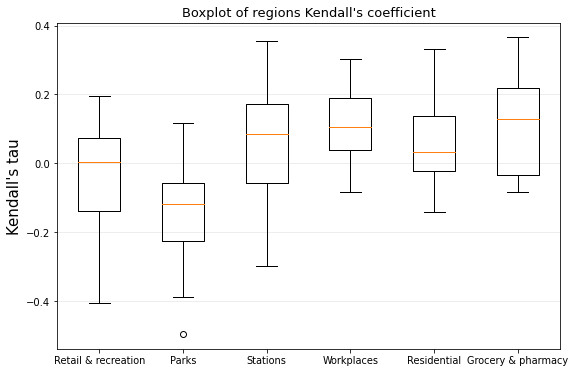

In [64]:
data_1 = df_tau['retail_and_recreation_percent_change_from_baseline']
data_2 = df_tau['parks_percent_change_from_baseline'] 
data_3 = df_tau['transit_stations_percent_change_from_baseline']
data_4 = df_tau['workplaces_percent_change_from_baseline']
data_5 = df_tau['residential_percent_change_from_baseline']
data_6 = df_tau['grocery_and_pharmacy_percent_change_from_baseline']
data = [data_1,data_2,data_3,data_4,data_5,data_6] 
  
fig, ax = plt.subplots(figsize=(9,6))
ax.boxplot(data)
ax.set_ylabel("Kendall's tau",size=15) 
ax.set_title("Boxplot of regions Kendall's coefficient",size=13) 
ax.set_xticklabels(['Retail & recreation', 'Parks','Stations', 'Workplaces','Residential','Grocery & pharmacy'],size=9.7)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

The boxplot above allows to understand the variation range of the Kendall's coefficients, calculated for each italian region. In particular the outliers are spotted. The points between the first and third quantiles, which correspond to the 25th and 75th percentiles, are hidden, as well as the point between the minimum and the maximum of the range. The median of the distributions is showed in orange.